In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data

tree_df = gpd.read_file('../data/tree_census/tree_air_summary_ct.shp')
income = pd.read_csv('../data/income/Income_by_Location.csv')
#https://datausa.io/profile/geo/new-york-ny

tree_df.rename(columns={'boro_ctlab':'boro_ctlabel',
                        'mean_tree_':'mean_tree_diameter',
                        'tree_densi':'tree_density',
                        'health_Goo':'health_good',
                        'health_Fai':'health_fair',
                        'health_Poo':'health_poor',
                        'health_Non':'health_none'}, inplace=True)

## Some cursory EDA

In [4]:
income.head()

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography
0,2019,2019,0,Total,51100,14133.0,"Census Tract 2, Bronx County, NY",14000US36005000200
1,2019,2019,0,Total,78409,11642.0,"Census Tract 4, Bronx County, NY",14000US36005000400
2,2019,2019,0,Total,34093,2370.0,"Census Tract 16, Bronx County, NY",14000US36005001600
3,2019,2019,0,Total,45156,8158.0,"Census Tract 19, Bronx County, NY",14000US36005001900
4,2019,2019,0,Total,20592,5007.0,"Census Tract 20, Bronx County, NY",14000US36005002000


In [31]:
# Look at distribution of income for each year recorded
describe = income.groupby('Year')['Household Income by Race'].describe()
describe['spread'] = describe['max'] - describe['min']
describe.sort_values('spread')

,count,mean,std,min,25%,50%,75%,max,spread
Year,,,,,,,,,
2013,2109.0,57709.097677,28060.810434,9959.0,37981.0,52841.0,71750.00,250001.0,240042.0
2018,2101.0,67291.849595,33041.489565,9939.0,44538.0,62993.0,83333.00,250001.0,240062.0
2015,2103.0,59282.870661,29384.441084,9829.0,39107.0,54563.0,73336.50,250001.0,240172.0
2016,2103.0,61277.164527,30110.018828,9740.0,40618.5,56771.0,75892.50,250001.0,240261.0
2019,2095.0,71126.189976,34767.467970,9740.0,47705.0,66534.0,86642.00,250001.0,240261.0
2014,2111.0,58570.773093,28904.947487,9327.0,38619.5,53882.0,73036.00,250001.0,240674.0
2017,2104.0,64140.145437,31891.856829,9053.0,41914.5,59574.5,79086.25,250001.0,240948.0


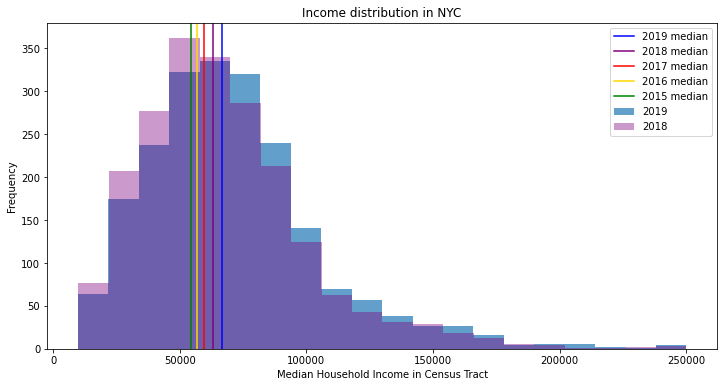

In [42]:
# Visualize
#color_dict = {2013:'red', 2014:'orange', 2015:'yellow', 2016:'green', 2017:'blue', 2018:'purple', 2019:'grey'}
plt.figure(figsize=(12,6))
plt.hist(x=income[income['Year'] == 2019]['Household Income by Race'], alpha=.7, label='2019', bins=20)
plt.hist(x=income[income['Year'] == 2018]['Household Income by Race'], alpha=.4, label='2018', bins=20, color='purple')
plt.axvline(income[income['Year'] == 2019]['Household Income by Race'].median(), color='blue', label='2019 median')
plt.axvline(income[income['Year'] == 2018]['Household Income by Race'].median(), color='purple', label='2018 median')
plt.axvline(income[income['Year'] == 2017]['Household Income by Race'].median(), color='red', label='2017 median')
plt.axvline(income[income['Year'] == 2016]['Household Income by Race'].median(), color='gold', label='2016 median')
plt.axvline(income[income['Year'] == 2015]['Household Income by Race'].median(), color='green', label='2015 median')
plt.title('Income distribution in NYC')
plt.xlabel('Median Household Income in Census Tract')
plt.ylabel('Frequency')
plt.legend();

- Overall trend in income has been upward from 2015-2019

## Match census tract numbers

In [4]:
tree_df.head()

,boro_ctlabel,borough,tract_area,mean_tree_diameter,alive,health_good,health_fair,health_poor,health_none,BoroCD,...,TD_Truck_0,TD_Vehicle,Summ_FPM_0,Wint_FPM_0,Summ_NO2_0,Wint_NO2_0,SO2_09-16C,O3_09-17Ch,near_park,geometry
0,1_10.01,1,8.678058e+05,9.416667,0.833333,0.333333,0.250000,0.250000,0.166667,103,...,-0.421053,-0.153473,-0.160299,-0.399579,-0.298023,-0.228850,-0.958631,0.200093,0.997909,"POLYGON ((991128.254 199590.251, 991121.229 19..."
1,1_10.02,1,2.225720e+06,8.037037,1.000000,0.555556,0.222222,0.222222,0.000000,103,...,-0.421053,-0.153473,-0.160299,-0.399579,-0.298023,-0.228850,-0.958631,0.200093,0.997909,"POLYGON ((991592.144 201146.692, 991543.601 20..."
2,1_100,1,1.859881e+06,7.268116,0.992754,0.572464,0.326087,0.094203,0.007246,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((993101.222 216017.046, 992982.220 21..."
3,1_101,1,1.891378e+06,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((987638.873 212444.531, 987582.221 21..."
4,1_102,1,1.860993e+06,5.880000,1.000000,0.640000,0.360000,0.000000,0.000000,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((992216.539 216507.687, 992091.031 21..."


In [5]:
# Divide up Geography codes

income['ct_11dig'] = income['ID Geography'].map(lambda x: x.split('US')[1])
income['ct_num'] = income['Geography'].map(lambda x: x.split(' ')[2].strip(',')) # Took out float conversion

boro_dict = {'New': 1, 'Bronx': 2, 'Kings': 3, 'Queens': 4, 'Richmond':5}
income['borough'] = income['Geography'].map(lambda x: x.split(' ')[3]).map(boro_dict)

In [6]:
income.groupby('borough')['ct_num'].nunique()

borough
1    279
2    333
3    748
4    644
5    108
Name: ct_num, dtype: int64

In [7]:
income.sort_values('ct_num')

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,ct_11dig,ct_num,borough
326,2019,2019,0,Total,96250,12924.0,"Census Tract 1, Kings County, NY",14000US36047000100,36047000100,1,3
8732,2015,2015,0,Total,70938,25488.0,"Census Tract 1, Kings County, NY",14000US36047000100,36047000100,1,3
4525,2017,2017,0,Total,88238,10981.0,"Census Tract 1, Kings County, NY",14000US36047000100,36047000100,1,3
1349,2019,2019,0,Total,150421,22022.0,"Census Tract 1, Queens County, NY",14000US36081000100,36081000100,1,4
11866,2014,2014,0,Total,125332,19627.0,"Census Tract 1, Queens County, NY",14000US36081000100,36081000100,1,4
...,...,...,...,...,...,...,...,...,...,...,...
12410,2014,2014,0,Total,22223,8283.0,"Census Tract 998.02, Queens County, NY",14000US36081099802,36081099802,998.02,4
10300,2015,2015,0,Total,34287,7875.0,"Census Tract 998.02, Queens County, NY",14000US36081099802,36081099802,998.02,4
3991,2018,2018,0,Total,41839,10736.0,"Census Tract 998.02, Queens County, NY",14000US36081099802,36081099802,998.02,4
14519,2013,2013,0,Total,22288,8414.0,"Census Tract 998.02, Queens County, NY",14000US36081099802,36081099802,998.02,4


In [8]:
# what do the ct_nums look like?
max([(len(x), x) for x in income['ct_num']])

(7, '1579.03')

In [9]:
# Create boro_ctlabel column to match tree df

income['boro_ctlabel'] = income['borough'].astype(str) + '_' + income['ct_num'].astype(str)

In [10]:
income.head()

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,ct_11dig,ct_num,borough,boro_ctlabel
0,2019,2019,0,Total,51100,14133.0,"Census Tract 2, Bronx County, NY",14000US36005000200,36005000200,2,2,2_2
1,2019,2019,0,Total,78409,11642.0,"Census Tract 4, Bronx County, NY",14000US36005000400,36005000400,4,2,2_4
2,2019,2019,0,Total,34093,2370.0,"Census Tract 16, Bronx County, NY",14000US36005001600,36005001600,16,2,2_16
3,2019,2019,0,Total,45156,8158.0,"Census Tract 19, Bronx County, NY",14000US36005001900,36005001900,19,2,2_19
4,2019,2019,0,Total,20592,5007.0,"Census Tract 20, Bronx County, NY",14000US36005002000,36005002000,20,2,2_20


In [11]:
# Re-separate income years
income_15 = income[income['Year'] == 2015].copy()
income_16 = income[income['Year'] == 2016].copy()
income_17 = income[income['Year'] == 2017].copy()
income_18 = income[income['Year'] == 2018].copy()
income_19 = income[income['Year'] == 2019].copy()

In [12]:
income['boro_ctlabel'].nunique(), tree_df['boro_ctlabel'].nunique()

(2112, 2148)

In [13]:
income_17.shape[0], tree_df.shape[0]

(2104, 2148)

In [14]:
# Find how many don't match
tree_minus_income = set(tree_df['boro_ctlabel'].unique()) - set(income['boro_ctlabel'].unique())
income_minus_tree = set(income['boro_ctlabel'].unique()) - set(tree_df['boro_ctlabel'].unique())
print(len(tree_minus_income), len(income_minus_tree))
#tree_minus_income

43 7


In [15]:
# Examine differences in boro_ctlabel between two dfs

print(sorted(list(tree_minus_income)))
print(sorted(list(income_minus_tree)))

['1_143', '1_217.03', '1_297', '1_311', '1_86.02', '2_163', '2_171', '2_24', '2_249', '2_319', '3_1180', '3_154', '3_175', '3_177', '3_18', '3_407', '3_666', '3_702.02', '3_852', '3_86', '3_960', '4_107.01', '4_1072.02', '4_1211', '4_1385.02', '4_171', '4_219', '4_229', '4_246', '4_299', '4_331', '4_37', '4_383.01', '4_383.02', '4_426', '4_50', '4_613.02', '4_624', '4_655.01', '4_716', '4_793', '4_918', '4_99']
['1_238.01', '1_238.02', '1_84', '2_504', '2_53', '3_259.02', '3_285.02']


In [16]:
income_17.sort_values('boro_ctlabel').head(10)

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,ct_11dig,ct_num,borough,boro_ctlabel
5279,2017,2017,0,Total,79205,17600.0,"Census Tract 10.01, New York County, NY",14000US36061001001,36061001001,10.01,1,1_10.01
5280,2017,2017,0,Total,18977,6312.0,"Census Tract 10.02, New York County, NY",14000US36061001002,36061001002,10.02,1,1_10.02
5368,2017,2017,0,Total,106705,26125.0,"Census Tract 100, New York County, NY",14000US36061010000,36061010000,100,1,1_100
5369,2017,2017,0,Total,148348,29197.0,"Census Tract 101, New York County, NY",14000US36061010100,36061010100,101,1,1_101
5370,2017,2017,0,Total,167500,62247.0,"Census Tract 102, New York County, NY",14000US36061010200,36061010200,102,1,1_102
5371,2017,2017,0,Total,98901,11325.0,"Census Tract 103, New York County, NY",14000US36061010300,36061010300,103,1,1_103
5372,2017,2017,0,Total,120217,20023.0,"Census Tract 104, New York County, NY",14000US36061010400,36061010400,104,1,1_104
5373,2017,2017,0,Total,126607,27215.0,"Census Tract 106.01, New York County, NY",14000US36061010601,36061010601,106.01,1,1_106.01
5374,2017,2017,0,Total,134943,22635.0,"Census Tract 106.02, New York County, NY",14000US36061010602,36061010602,106.02,1,1_106.02
5375,2017,2017,0,Total,144881,21498.0,"Census Tract 108, New York County, NY",14000US36061010800,36061010800,108,1,1_108


In [17]:
tree_df.sort_values('boro_ctlabel').head(10)

,boro_ctlabel,borough,tract_area,mean_tree_diameter,alive,health_good,health_fair,health_poor,health_none,BoroCD,...,TD_Truck_0,TD_Vehicle,Summ_FPM_0,Wint_FPM_0,Summ_NO2_0,Wint_NO2_0,SO2_09-16C,O3_09-17Ch,near_park,geometry
0,1_10.01,1,8.678058e+05,9.416667,0.833333,0.333333,0.250000,0.250000,0.166667,103,...,-0.421053,-0.153473,-0.160299,-0.399579,-0.298023,-0.228850,-0.958631,0.200093,0.997909,"POLYGON ((991128.254 199590.251, 991121.229 19..."
1,1_10.02,1,2.225720e+06,8.037037,1.000000,0.555556,0.222222,0.222222,0.000000,103,...,-0.421053,-0.153473,-0.160299,-0.399579,-0.298023,-0.228850,-0.958631,0.200093,0.997909,"POLYGON ((991592.144 201146.692, 991543.601 20..."
2,1_100,1,1.859881e+06,7.268116,0.992754,0.572464,0.326087,0.094203,0.007246,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((993101.222 216017.046, 992982.220 21..."
3,1_101,1,1.891378e+06,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((987638.873 212444.531, 987582.221 21..."
4,1_102,1,1.860993e+06,5.880000,1.000000,0.640000,0.360000,0.000000,0.000000,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((992216.539 216507.687, 992091.031 21..."
5,1_103,1,1.875918e+06,7.703704,0.925926,0.740741,0.111111,0.074074,0.074074,104,...,0.419355,0.123950,-0.173913,-0.386305,-0.278351,-0.237035,-0.957592,0.212734,0.789133,"POLYGON ((986060.840 213319.862, 985926.736 21..."
6,1_104,1,1.864600e+06,6.436170,0.962766,0.670213,0.271277,0.021277,0.037234,105,...,-0.317073,-0.387833,-0.255147,-0.413482,-0.315111,-0.281843,-0.958212,0.482615,0.635637,"POLYGON ((991325.882 217001.689, 991199.221 21..."
7,1_106.01,1,1.305575e+06,8.204819,0.971888,0.690763,0.192771,0.088353,0.028112,106,...,-0.526316,-0.181395,-0.213983,-0.400242,-0.295100,-0.257730,-0.958785,0.302928,0.908681,"POLYGON ((995670.105 215537.938, 995589.232 21..."
8,1_106.02,1,1.344539e+06,6.763158,0.888158,0.598684,0.223684,0.065789,0.111842,108,...,-0.228571,-0.090625,-0.195367,-0.403131,-0.291774,-0.219676,-0.962656,0.211261,0.686200,"POLYGON ((996346.983 216345.506, 996168.342 21..."
9,1_108,1,1.963968e+06,8.169329,0.984026,0.769968,0.182109,0.031949,0.015974,106,...,-0.526316,-0.181395,-0.213983,-0.400242,-0.295100,-0.257730,-0.958785,0.302928,0.908681,"POLYGON ((994786.741 216028.856, 994657.453 21..."


In [18]:
# How much data will be lost if we drop missing rows?
# 50 total mismatches
print(f'pct to drop: {round(50 / tree_df.shape[0], 3)}')

pct to drop: 0.023


## Merge

In [19]:
trees_income_15 = pd.merge(tree_df, income_15, how='inner', on='boro_ctlabel')
trees_income_15.drop(columns=['Race', 'ct_num', 'Geography', 'ID Geography', 'Household Income by Race Moe', 'borough_y', 'ID Year', 'ID Race'], inplace=True)
trees_income_15.rename(columns={'borough_x': 'borough', 'Household Income by Race': 'hh_income'}, inplace=True)

trees_income_16 = pd.merge(tree_df, income_16, how='inner', on='boro_ctlabel')
trees_income_16.drop(columns=['Race', 'ct_num', 'Geography', 'ID Geography', 'Household Income by Race Moe', 'borough_y', 'ID Year', 'ID Race'], inplace=True)
trees_income_16.rename(columns={'borough_x': 'borough', 'Household Income by Race': 'hh_income'}, inplace=True)

trees_income_17 = pd.merge(tree_df, income_17, how='inner', on='boro_ctlabel')
trees_income_17.drop(columns=['Race', 'ct_num', 'Geography', 'ID Geography', 'Household Income by Race Moe', 'borough_y', 'ID Year', 'ID Race'], inplace=True)
trees_income_17.rename(columns={'borough_x': 'borough', 'Household Income by Race': 'hh_income'}, inplace=True)

In [20]:
# Clean up 2017 dataframe as this will be used for modeling
trees_income_17.columns

Index(['boro_ctlabel', 'borough', 'tract_area', 'mean_tree_diameter', 'alive',
       'health_good', 'health_fair', 'health_poor', 'health_none', 'BoroCD',
       'tree_count', 'tree_density', 'n_species', 'alive_05', 'tree_cou_1',
       'tree_den_1', 'n_species_', 'treecount_', 'treedens_c', 'nspecies_c',
       'alive_chg', 'CD_name', '13S_FPM', '16-17W_FPM', '09-10W_FPM',
       '12-13W_FPM', '09S_FPM', '10S_FPM', '10-11W_FPM', '15S_FPM',
       '14-15W_FPM', '15-16W_FPM', '11-12W_FPM', '12S_FPM', '16S_FPM',
       '17S_FPM', '08-09W_FPM', '11S_FPM', '13-14W_FPM', '14S_FPM', '11S_NO2',
       '13-14W_NO2', '17S_NO2', '14S_NO2', '16S_NO2', '08-09W_NO2',
       '12-13W_NO2', '09S_NO2', '11-12W_NO2', '12S_NO2', '14-15W_NO2',
       '15-16W_NO2', '16-17W_NO2', '09-10W_NO2', '10-11W_NO2', '10S_NO2',
       '13S_NO2', '15S_NO2', '10-11W_SO2', '11-12W_SO2', '08-09W_SO2',
       '12-13W_SO2', '13-14W_SO2', '14-15W_SO2', '15-16W_SO2', '09-10W_SO2',
       '09S_O3', '13S_O3', '11S_O3', '14S_

In [25]:
trees_income_17.drop(columns=['ct_11dig', 'Year', 'CD_Name_1'], inplace=True)

In [26]:
#trees_income_15.to_csv('../data/data_for_modeling/trees_income_2015.csv')
#trees_income_15.to_file('../data/data_for_modeling/trees_income_2015.shp')

#trees_income_16.to_csv('../data/data_for_modeling/trees_income_2016.csv')
#trees_income_16.to_file('../data/data_for_modeling/trees_income_2016.shp')

trees_income_17.to_csv('../data/complete_data/trees_income_2017.csv')
trees_income_17.to_file('../data/complete_data/trees_income_2017.shp')

/var/folders/by/f27ws03s62v8tb7315j3kxm80000gn/T/ipykernel_40426/2877390424.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  trees_income_17.to_file('../data/complete_data/trees_income_2017.shp')
